In [1]:
import os
import json
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def visualize_instances(wide_path):
    image_path = os.path.join(wide_path, "image.png")
    json_path = os.path.join(wide_path, "instances.json")

    # 加载图像
    image = cv2.imread(image_path)
    if image is None:
        print(f"❌ 无法读取图像: {image_path}")
        return
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # 加载 JSON
    try:
        with open(json_path, "r") as f:
            data = json.load(f)
    except Exception as e:
        print(f"❌ 无法读取 JSON: {json_path}")
        print(str(e))
        return

    # 可视化
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.imshow(image)
    ax.set_title("原始检测框 (instances.json)", fontsize=16)
    print(len(data))
    for obj in data:
        box = obj.get("box_2d_rend", None)
        if not box or len(box) != 4:
            continue
        x1, y1, x2, y2 = box
        width = x2 - x1
        height = y2 - y1
        rect = Rectangle((x1, y1), width, height, linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(x1, y1 - 5, "object", color='red', fontsize=10)

    plt.axis("off")
    plt.show()

14


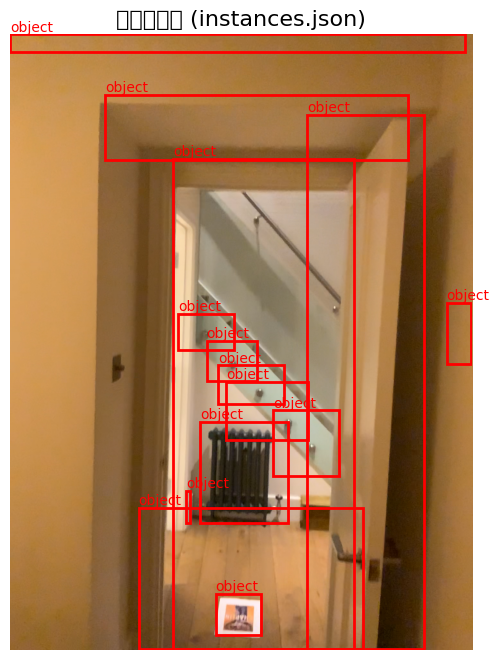

In [5]:
# 指定 wide 文件夹路径（请替换为你的实际路径）
wide_path = "/home_sfs/zhouenshen/dataset/3D/cubifyanything/filter_step_20/42444499/2494516269833/wide"

# 可视化原始
visualize_instances(wide_path)
